In [197]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns


In [198]:
df = pd.read_csv(r"C:\Users\Alshuruq Company\Desktop\DataCleaning\Student Exams Scores Prediction.csv")
df.head(10)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,10-May,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,10-May,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,10-May,76,78,75
5,5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,10-May,73,84,79
6,6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,10-May,85,93,89
7,7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39
8,8,male,group D,high school,free/reduced,completed,single,sometimes,no,3.0,private,> 10,65,64,68
9,9,female,group B,high school,free/reduced,none,married,regularly,yes,NaN,private,< 5,37,59,50


# Analyzing and Cleaning the Data
#### The main goal of data understanding is to gain general insights about the data, which covers the number of rows and columns, values in the data, datatypes, Missing values in the dataset, and dublicated values 
#### In yhe first, I drop null values after that I use most_frequent value to handle Null values that appear after  null values


In [199]:
print(df.shape)

(30641, 15)


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [201]:
# Removed the 'Unnamed' column

df = df.drop('Unnamed: 0', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


In [202]:
## Changing the datatype of 'NrSiblings' into int64
df['NrSiblings'] = pd.to_numeric(df['NrSiblings'], errors='coerce')

df['NrSiblings'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 30641 entries, 0 to 30640
Series name: NrSiblings
Non-Null Count  Dtype  
--------------  -----  
29069 non-null  float64
dtypes: float64(1)
memory usage: 239.5 KB


In [203]:
 # Check the number of null values for each column in the dataset

for col in df.columns:
   print('Null Values for column {} is {}%'.format(col, np.round(df[col].isnull().sum()*100 / len(df[col])),2))


Null Values for column Gender is 0.0%
Null Values for column EthnicGroup is 6.0%
Null Values for column ParentEduc is 6.0%
Null Values for column LunchType is 0.0%
Null Values for column TestPrep is 6.0%
Null Values for column ParentMaritalStatus is 4.0%
Null Values for column PracticeSport is 2.0%
Null Values for column IsFirstChild is 3.0%
Null Values for column NrSiblings is 5.0%
Null Values for column TransportMeans is 10.0%
Null Values for column WklyStudyHours is 3.0%
Null Values for column MathScore is 0.0%
Null Values for column ReadingScore is 0.0%
Null Values for column WritingScore is 0.0%


In [204]:
df['EthnicGroup'].unique()

array([nan, 'group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

In [205]:
# Count the occurrences of each unique value in the 'EthnicGroup' column
ethnic_group_counts = df['EthnicGroup'].value_counts()

print(ethnic_group_counts)


EthnicGroup
group C    9212
group D    7503
group B    5826
group E    4041
group A    2219
Name: count, dtype: int64


In [206]:
# Count the number of null values in the entire DataFrame
null_count_df = df.isnull().sum()
print("Number of null values in each column:")
print(null_count_df)

Number of null values in each column:
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64


In [207]:
## Drop null values from selected columns

df1b = df.copy()

df1b = df1b.dropna(subset=['EthnicGroup','ParentEduc','TestPrep','NrSiblings','TransportMeans'], axis=0)

df1b.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21721 entries, 2 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               21721 non-null  object 
 1   EthnicGroup          21721 non-null  object 
 2   ParentEduc           21721 non-null  object 
 3   LunchType            21721 non-null  object 
 4   TestPrep             21721 non-null  object 
 5   ParentMaritalStatus  20883 non-null  object 
 6   PracticeSport        21298 non-null  object 
 7   IsFirstChild         21094 non-null  object 
 8   NrSiblings           21721 non-null  float64
 9   TransportMeans       21721 non-null  object 
 10  WklyStudyHours       21038 non-null  object 
 11  MathScore            21721 non-null  int64  
 12  ReadingScore         21721 non-null  int64  
 13  WritingScore         21721 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 2.5+ MB


In [208]:
# Count the number of null values in the entire DataFrame
null_count_df = df1b.isnull().sum()
print("Number of null values in each column:")
print(null_count_df)

Number of null values in each column:
Gender                   0
EthnicGroup              0
ParentEduc               0
LunchType                0
TestPrep                 0
ParentMaritalStatus    838
PracticeSport          423
IsFirstChild           627
NrSiblings               0
TransportMeans           0
WklyStudyHours         683
MathScore                0
ReadingScore             0
WritingScore             0
dtype: int64


In [209]:
# Count the occurrences of each unique value in the 'EthnicGroup' column
ParentMaritalStatus_counts = df1b["ParentMaritalStatus"].value_counts()

print(ParentMaritalStatus_counts)

ParentMaritalStatus
married     11946
single       5004
divorced     3521
widowed       412
Name: count, dtype: int64


In [210]:
# Create a copy of the DataFrame to ensure df1b remains unchanged
df2 = df1b.copy()

# Replace NaN values in the "ParentMaritalStatus" column with "married"
df2["ParentMaritalStatus"] = df2["ParentMaritalStatus"].replace(to_replace=np.nan, value="married")

# Print the modified DataFrame
print(df2)


       Gender EthnicGroup          ParentEduc     LunchType   TestPrep  \
2      female     group B     master's degree      standard       none   
4        male     group C        some college      standard       none   
5      female     group B  associate's degree      standard       none   
6      female     group B        some college      standard  completed   
7        male     group B        some college  free/reduced       none   
...       ...         ...                 ...           ...        ...   
30635    male     group C        some college      standard       none   
30636  female     group D         high school      standard       none   
30637    male     group E         high school      standard       none   
30639  female     group D  associate's degree      standard  completed   
30640    male     group B        some college      standard       none   

      ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings  \
2                  single     sometimes    

In [211]:
# Count the number of null values in the entire DataFrame
null_count_df = df2.isnull().sum()
print("Number of null values in each column:")
print(null_count_df)

Number of null values in each column:
Gender                   0
EthnicGroup              0
ParentEduc               0
LunchType                0
TestPrep                 0
ParentMaritalStatus      0
PracticeSport          423
IsFirstChild           627
NrSiblings               0
TransportMeans           0
WklyStudyHours         683
MathScore                0
ReadingScore             0
WritingScore             0
dtype: int64


In [212]:
df["PracticeSport"].unique()
#Count the occurrences of each unique value in the 'EthnicGroup' column
ParentMaritalStatus_counts = df1b["PracticeSport"].value_counts()

print(ParentMaritalStatus_counts)

PracticeSport
sometimes    10771
regularly     7688
never         2839
Name: count, dtype: int64


In [213]:
# Create a copy of the DataFrame to ensure df1b remains unchanged
df3 = df2.copy()

# Replace NaN values in the "ParentMaritalStatus" column with "married"
df3["PracticeSport"] = df3["PracticeSport"].replace(to_replace=np.nan, value="sometimes")

# Print the modified DataFrame
print(df3)


       Gender EthnicGroup          ParentEduc     LunchType   TestPrep  \
2      female     group B     master's degree      standard       none   
4        male     group C        some college      standard       none   
5      female     group B  associate's degree      standard       none   
6      female     group B        some college      standard  completed   
7        male     group B        some college  free/reduced       none   
...       ...         ...                 ...           ...        ...   
30635    male     group C        some college      standard       none   
30636  female     group D         high school      standard       none   
30637    male     group E         high school      standard       none   
30639  female     group D  associate's degree      standard  completed   
30640    male     group B        some college      standard       none   

      ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings  \
2                  single     sometimes    

In [214]:
null_val= df3["PracticeSport"].isnull().sum()
null_val

0

In [215]:
ParentMaritalStatus_counts = df3["IsFirstChild"].value_counts()

print(ParentMaritalStatus_counts)

IsFirstChild
yes    13601
no      7493
Name: count, dtype: int64


In [216]:
# Create a copy of the DataFrame to ensure df1b remains unchanged
df4 = df3.copy()

# Replace NaN values in the "ParentMaritalStatus" column with "married"
df4["IsFirstChild"] = df4["IsFirstChild"].replace(to_replace=np.nan, value="yes")


# Print the modified DataFrame
print(df4)


       Gender EthnicGroup          ParentEduc     LunchType   TestPrep  \
2      female     group B     master's degree      standard       none   
4        male     group C        some college      standard       none   
5      female     group B  associate's degree      standard       none   
6      female     group B        some college      standard  completed   
7        male     group B        some college  free/reduced       none   
...       ...         ...                 ...           ...        ...   
30635    male     group C        some college      standard       none   
30636  female     group D         high school      standard       none   
30637    male     group E         high school      standard       none   
30639  female     group D  associate's degree      standard  completed   
30640    male     group B        some college      standard       none   

      ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings  \
2                  single     sometimes    

In [217]:
nu_val= df4["IsFirstChild"].isnull().sum()
nu_val

0

In [218]:
ParentMaritalStatus_counts = df["WklyStudyHours"].value_counts()

print(ParentMaritalStatus_counts)

WklyStudyHours
10-May    16246
< 5        8238
> 10       5202
Name: count, dtype: int64


In [219]:
df5 = df4.copy()
df5["WklyStudyHours"] = df5["WklyStudyHours"].replace(to_replace=np.nan, value="10-May")
df5["WklyStudyHours"]

2           < 5
4        10-May
5        10-May
6        10-May
7          > 10
          ...  
30635    10-May
30636    10-May
30637    10-May
30639    10-May
30640    10-May
Name: WklyStudyHours, Length: 21721, dtype: object

In [220]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21721 entries, 2 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               21721 non-null  object 
 1   EthnicGroup          21721 non-null  object 
 2   ParentEduc           21721 non-null  object 
 3   LunchType            21721 non-null  object 
 4   TestPrep             21721 non-null  object 
 5   ParentMaritalStatus  21721 non-null  object 
 6   PracticeSport        21721 non-null  object 
 7   IsFirstChild         21721 non-null  object 
 8   NrSiblings           21721 non-null  float64
 9   TransportMeans       21721 non-null  object 
 10  WklyStudyHours       21721 non-null  object 
 11  MathScore            21721 non-null  int64  
 12  ReadingScore         21721 non-null  int64  
 13  WritingScore         21721 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 2.5+ MB


In [221]:
df5.describe()

,NrSiblings,MathScore,ReadingScore,WritingScore
count,21721.000000,21721.000000,21721.000000,21721.000000
mean,2.140785,66.589844,69.467152,68.534736
std,1.447413,15.382437,14.787346,15.488860
min,0.000000,0.000000,10.000000,4.000000
25%,1.000000,56.000000,59.000000,58.000000
50%,2.000000,67.000000,70.000000,69.000000
75%,3.000000,78.000000,80.000000,79.000000
max,7.000000,100.000000,100.000000,100.000000


In [222]:
value_counts = df5["NrSiblings"].value_counts()
print(value_counts)

NrSiblings
1.0    6109
2.0    5099
3.0    4625
0.0    2308
4.0    2203
5.0     964
7.0     208
6.0     205
Name: count, dtype: int64


In [224]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21721 entries, 2 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               21721 non-null  object 
 1   EthnicGroup          21721 non-null  object 
 2   ParentEduc           21721 non-null  object 
 3   LunchType            21721 non-null  object 
 4   TestPrep             21721 non-null  object 
 5   ParentMaritalStatus  21721 non-null  object 
 6   PracticeSport        21721 non-null  object 
 7   IsFirstChild         21721 non-null  object 
 8   NrSiblings           21721 non-null  float64
 9   TransportMeans       21721 non-null  object 
 10  WklyStudyHours       21721 non-null  object 
 11  MathScore            21721 non-null  int64  
 12  ReadingScore         21721 non-null  int64  
 13  WritingScore         21721 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 2.5+ MB


# Exploratory Data Analysis ("EDA")

In [225]:
df5.describe().T

,count,mean,std,min,25%,50%,75%,max
NrSiblings,21721.0,2.140785,1.447413,0.0,1.0,2.0,3.0,7.0
MathScore,21721.0,66.589844,15.382437,0.0,56.0,67.0,78.0,100.0
ReadingScore,21721.0,69.467152,14.787346,10.0,59.0,70.0,80.0,100.0
WritingScore,21721.0,68.534736,15.488860,4.0,58.0,69.0,79.0,100.0


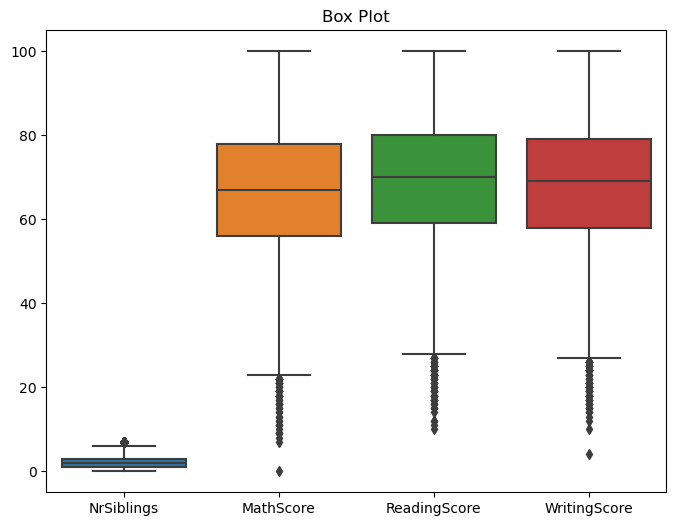

In [226]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df5)
plt.title('Box Plot')
plt.show()

In [227]:
value_counts = df5["MathScore"].value_counts()
print(value_counts)

MathScore
64    629
67    577
70    563
62    554
63    548
     ... 
17      2
10      1
7       1
0       1
8       1
Name: count, Length: 95, dtype: int64


In [228]:
value_counts = df5["ReadingScore"].value_counts()
print(value_counts)

ReadingScore
65    704
74    583
66    579
71    560
72    553
     ... 
15      2
12      2
11      1
10      1
14      1
Name: count, Length: 90, dtype: int64


In [229]:
value_counts = df5["WritingScore"].value_counts()
print(value_counts)

WritingScore
67    585
70    535
66    533
78    533
72    522
     ... 
14      2
13      1
10      1
12      1
4       1
Name: count, Length: 91, dtype: int64


#### Related to the upper 3 cells i find that i has outliers

In [230]:
Q1 = np.percentile(df5["MathScore"], 25)
Q3 = np.percentile(df5["MathScore"], 75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df5[(df5["MathScore"] < lower_bound) | (df5["MathScore"] > upper_bound)]

print("Outliers appear in : " ,outliers)

median_score = df5["MathScore"].median()

# Replace outliers with the median
df5.loc[df5["MathScore"] < lower_bound, "MathScore"] = median_score
df5.loc[df5["MathScore"] > upper_bound, "MathScore"] = median_score

print("Data after replacing outliers with the median:\n", df5)


Outliers appear in :         Gender EthnicGroup          ParentEduc     LunchType   TestPrep  \
17     female     group B    some high school  free/reduced       none   
55     female     group C    some high school  free/reduced       none   
136    female     group C        some college  free/reduced       none   
751    female     group B        some college      standard       none   
928    female     group B         high school  free/reduced       none   
2984     male     group B        some college  free/reduced       none   
4052     male     group C        some college  free/reduced  completed   
4311   female     group C         high school      standard       none   
4622     male     group C    some high school  free/reduced       none   
4886     male     group B         high school  free/reduced       none   
4966   female     group A  associate's degree  free/reduced       none   
5084   female     group A    some high school  free/reduced       none   
5263   female   

<Axes: >

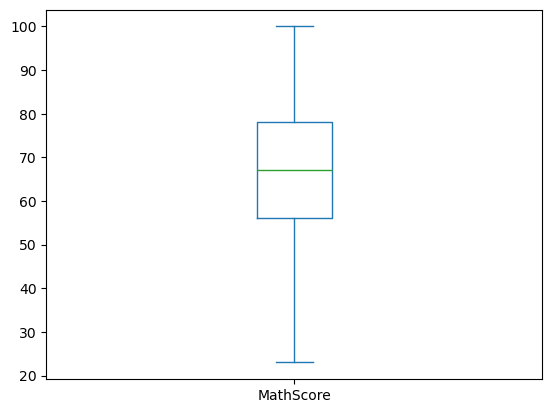

In [231]:
df5["MathScore"].plot(kind='box')

In [232]:
Q1 = np.percentile(df5["ReadingScore"], 25)
Q3 = np.percentile(df5["ReadingScore"], 75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df5[(df5["ReadingScore"] < lower_bound) | (df5["ReadingScore"] > upper_bound)]

print("Outliers appear in : " ,outliers)

median_score = df5["ReadingScore"].median()

# Replace outliers with the median
df5.loc[df5["ReadingScore"] < lower_bound] = median_score
df5.loc[df5["ReadingScore"] > upper_bound] = median_score

print("Data after replacing outliers with the median:\n", df5)


Outliers appear in :         Gender EthnicGroup          ParentEduc     LunchType   TestPrep  \
55     female     group C    some high school  free/reduced       none   
69       male     group E    some high school      standard       none   
308      male     group A        some college  free/reduced       none   
565      male     group B         high school  free/reduced       none   
928    female     group B         high school  free/reduced       none   
...       ...         ...                 ...           ...        ...   
28137    male     group C    some high school  free/reduced       none   
28687    male     group C  associate's degree  free/reduced  completed   
29000    male     group A        some college  free/reduced       none   
30389    male     group B  associate's degree  free/reduced       none   
30478    male     group D  associate's degree      standard       none   

      ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings  \
55                 si

<Axes: >

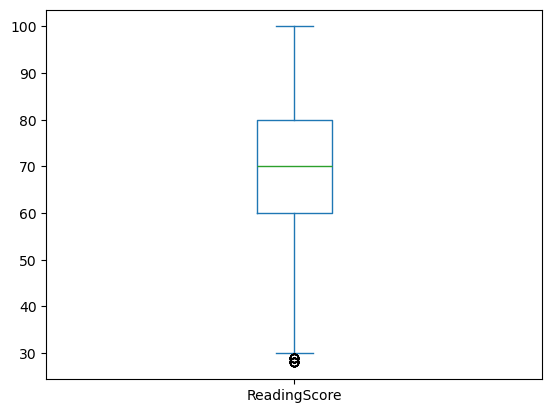

In [233]:
df5["ReadingScore"].plot(kind='box')

Outliers appear in :         Gender EthnicGroup          ParentEduc     LunchType   TestPrep  \
319    female     group B    some high school  free/reduced       none   
2179     male     group D         high school      standard       none   
2916     male     group C    some high school  free/reduced       none   
2984     male     group B        some college  free/reduced       none   
4474     male     group B    some high school  free/reduced       none   
5084   female     group A    some high school  free/reduced       none   
5641   female     group D    some high school  free/reduced       none   
6754     male     group C    some high school  free/reduced       none   
7501     male     group A         high school      standard       none   
8439     male     group B        some college      standard       none   
8487     male     group E    some high school  free/reduced       none   
9592     male     group E    some high school  free/reduced       none   
9593     male   

<Axes: >

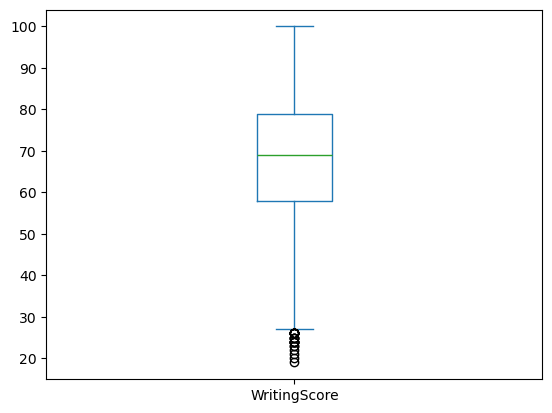

In [234]:
Q1 = np.percentile(df5["WritingScore"], 25)
Q3 = np.percentile(df5["WritingScore"], 75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df5[(df5["WritingScore"] < lower_bound) | (df5["WritingScore"] > upper_bound)]

print("Outliers appear in : " ,outliers)

median_score = df5["WritingScore"].median()

# Replace outliers with the median
df5.loc[df5["MathScore"] < lower_bound, "WritingScore"] = median_score
df5.loc[df5["MathScore"] > upper_bound, "WritingScore"] = median_score
df5["WritingScore"].plot(kind='box')


In [235]:
df5.describe()

,NrSiblings,MathScore,ReadingScore,WritingScore
count,21721.000000,21721.000000,21721.000000,21721.000000
mean,2.353437,66.808066,69.619677,68.758114
std,4.057073,15.070205,14.536759,15.176323
min,0.000000,23.000000,28.000000,19.000000
25%,1.000000,56.000000,60.000000,58.000000
50%,2.000000,67.000000,70.000000,69.000000
75%,3.000000,78.000000,80.000000,79.000000
max,70.000000,100.000000,100.000000,100.000000


##### I handle outliers by using median

<Axes: >

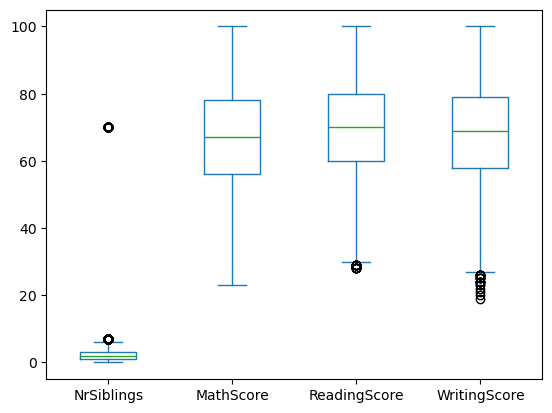

In [238]:
df5.plot(kind = 'box')

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
91,male,group B,some college,standard,none,married,sometimes,no,7.0,school_bus,10-May,79,67,67
183,male,group E,high school,free/reduced,none,married,sometimes,no,7.0,private,> 10,56,56,52
287,male,group A,some college,standard,none,married,sometimes,yes,7.0,private,10-May,69,67,69
441,male,group A,high school,free/reduced,completed,married,regularly,no,7.0,school_bus,> 10,76,69,67
617,female,group A,high school,standard,completed,married,regularly,yes,7.0,private,10-May,70,81,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28284,male,group B,some college,standard,none,married,sometimes,yes,7.0,private,10-May,60,57,53
28310,female,group E,some college,standard,none,married,sometimes,no,7.0,private,10-May,75,85,82
28433,female,group B,high school,standard,completed,divorced,sometimes,no,7.0,school_bus,10-May,54,63,67
28835,female,group D,some college,standard,none,married,regularly,yes,7.0,private,< 5,73,86,86


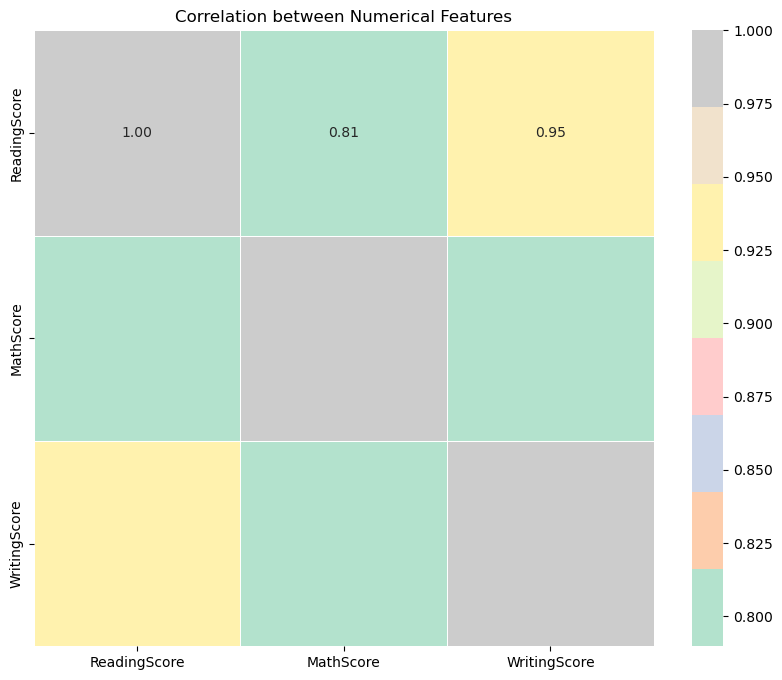

In [243]:
# Define the numerical columns
numericalCols = ['ReadingScore', 'MathScore', 'WritingScore']

# Calculate the correlation matrix
correlationMatrix = df5[numericalCols].corr()

# Create the heatmap with a specific color palette
plt.figure(figsize=(10, 8))
cmap = sns.color_palette("Pastel2")
cmap_as_list = list(cmap)
cmap_as_list[3] = (1.0, 0.8, 0.8)
sns.heatmap(correlationMatrix, annot=True, cmap=sns.color_palette(cmap_as_list), fmt=".2f", linewidths=0.5)

# Add the title
plt.title('Correlation between Numerical Features')

# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


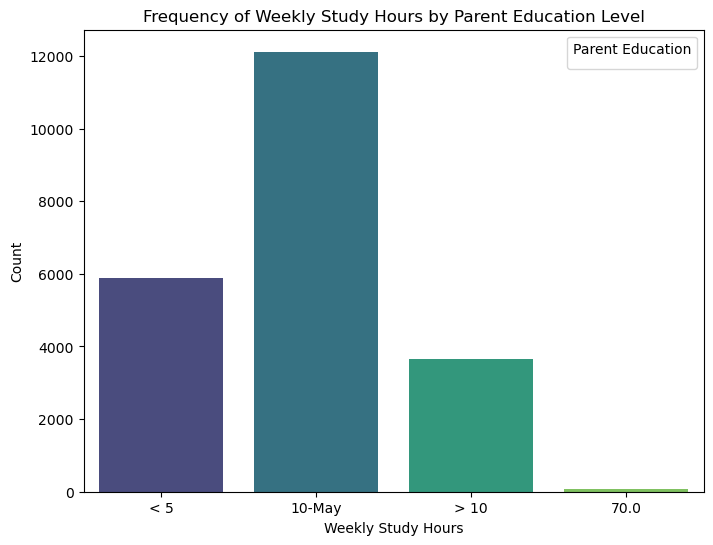

In [247]:
# Plot a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df6, x="WklyStudyHours", palette="viridis")
plt.title('Frequency of Weekly Study Hours by Parent Education Level')
plt.xlabel('Weekly Study Hours')
plt.ylabel('Count')
plt.legend(title='Parent Education')
plt.show()